In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# How likely am I to get a ticket vs. a warning?

In [4]:
data = pd.DataFrame([
    (66, 'Warning'),
    (68, 'Warning'),
    (70, 'Warning'),
    (74, 'Ticket'),
    (75, 'Warning'),
    (76, 'Ticket'),
    (77, 'Warning'),
    (80, 'Ticket'),
    (85, 'Ticket'),
    (93, 'Ticket')
    ],
    columns=('Speed', 'Outcome')
)
data

,Speed,Outcome
0,66,Warning
1,68,Warning
2,70,Warning
3,74,Ticket
4,75,Warning
5,76,Ticket
6,77,Warning
7,80,Ticket
8,85,Ticket
9,93,Ticket


In [5]:
def map_outcome_to_number(outcome):
    return (outcome == 'Ticket').astype(int)

numerical_data = data.copy()
numerical_data['Outcome'] = map_outcome_to_number(data['Outcome'])
numerical_data

,Speed,Outcome
0,66,0
1,68,0
2,70,0
3,74,1
4,75,0
5,76,1
6,77,0
7,80,1
8,85,1
9,93,1


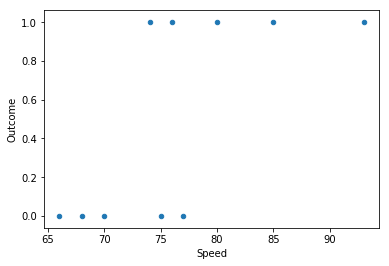

In [6]:
numerical_data.plot.scatter('Speed', 'Outcome')

## Step 0) Nudge the data

In [7]:
nudged_data = numerical_data.copy()
nudged_data['Outcome'] += np.sign(.5 - numerical_data['Outcome'])*.001
nudged_data

,Speed,Outcome
0,66,0.001
1,68,0.001
2,70,0.001
3,74,0.999
4,75,0.001
5,76,0.999
6,77,0.001
7,80,0.999
8,85,0.999
9,93,0.999


## Step 1) Transform the data

$$(x_i, y_i) \mapsto \left(x_i, \ln \frac{1 - y_i}{y_i}\right)$$

In [8]:
def y_tilde(y):
    return np.log((1 - y)/y)

In [9]:
transformed_data = nudged_data.copy()
transformed_data['Outcome'] = y_tilde(nudged_data['Outcome'])
transformed_data

,Speed,Outcome
0,66,6.906755
1,68,6.906755
2,70,6.906755
3,74,-6.906755
4,75,6.906755
5,76,-6.906755
6,77,6.906755
7,80,-6.906755
8,85,-6.906755
9,93,-6.906755


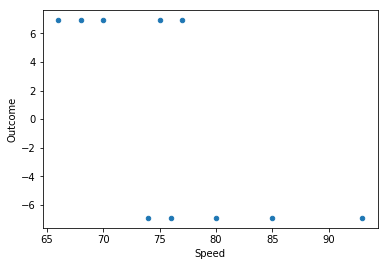

In [10]:
transformed_data.plot.scatter('Speed', 'Outcome')

## Step 2) Fit a straight line to transformed data

$$
\begin{align}
        \label{eqn:leastsq_b_1}
        c_1
        &=
        \frac{
            \displaystyle
            \sum_{i=1}^n
            x_i y_i
            -
            \frac{1}{n}
            \left(
                \sum_{i=1}^n 
                y_i 
            \right)
            \left(
                \sum_{i=1}^n
                x_i 
            \right)
            }{
            \displaystyle
            \sum_{i=1}^n
            x_i^2 
            - 
            \frac{1}{n}
            \left( \sum_{i=1}^n x_i \right)^2
        }
        \\[1em]
        \label{eqn:leastsq_b_0}
        c_0 
        &=
        \frac{1}{n}
        \left(
            \sum_{i=1}^n 
            y_i 
            -
            c_1
            \sum_{i=1}^n
            x_i
        \right)
    \end{align}
$$

In [11]:
x = transformed_data['Speed']
y = transformed_data['Outcome']
n = len(x)

c_1 = (
    (x * y).sum() - 1/n * y.sum() * x.sum()
)/(
    (x**2).sum() - 1/n * x.sum()**2
)

c_0 = 1/n * (y.sum() - c_1 * x.sum())

## Step 3) Convert parameters back

(Nothing to do here)

In [12]:
def fitted_function(x):
    return 1/(1 + np.exp(c_0 + c_1 * x))

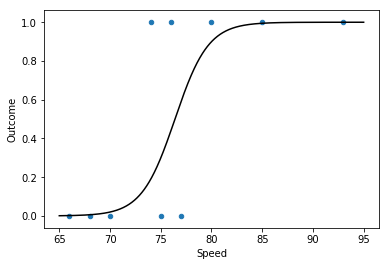

In [13]:
xx = np.linspace(65, 95, 1000)
yy = fitted_function(xx)

numerical_data.plot.scatter('Speed', 'Outcome')
plt.plot(xx, yy, color='black')

## Making predictions

What is the probability of a ticket if I'm pulled over while going 75 MPH?

In [14]:
fitted_function(75)

0.2990877034290775

What about if I'm going 100?

In [15]:
fitted_function(100)

0.9999994177217588